In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators
from matplotlib_venn import venn3
import seaborn as sns

In [ ]:
# Load data
data_ec_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/pred_metagenome_contrib.tsv', sep='\t', dtype=str)
data_ec_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', dtype=str)
data_weighted_nsti = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/weighted_nsti.tsv', sep='\t', dtype=str)
data_asv_abun_norm = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/seqtab_norm.tsv', sep='\t', dtype=str)
data_ko_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/KO_metagenome_out/pred_metagenome_contrib.tsv', sep='\t', dtype=str)
data_ko_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/KO_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', dtype=str)
data_path_abun_contrib = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/pathways_out/path_abun_contrib.tsv', sep='\t', dtype=str)
data_path_abun_unstrat = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/pathways_out/path_abun_unstrat.tsv', sep='\t', dtype=str)
data_weighted_nsti = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/EC_metagenome_out/weighted_nsti.tsv', sep='\t', dtype=str)
data_nsti_map = pd.read_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/marker_predicted_and_nsti.tsv', sep='\t', dtype=str)

In [37]:
# Filter to three samples (barcode01 = Køng_SBP_silaged, barcode25 = NL_SBP_silaged, barcode49 = Køng_PR1)
samples = ['barcode01', 'barcode25', 'barcode49']
samples_unstrat = ['function', 'barcode01', 'barcode25', 'barcode49']
data_ec_contrib_filtered = data_ec_contrib[data_ec_contrib["sample"].isin(samples)]
data_ec_unstrat_filtered = data_ec_unstrat[samples_unstrat]
data_weighted_nsti_filtered = data_weighted_nsti[data_weighted_nsti["sample"].isin(samples)]
data_asv_abun_norm_filtered = data_asv_abun_norm[samples]
data_ko_contrib_filtered = data_ko_contrib[data_ko_contrib["sample"].isin(samples)]
data_ko_unstrat_filtered = data_ko_unstrat[samples_unstrat]
data_path_abun_contrib_filtered = data_path_abun_contrib[data_path_abun_contrib["sample"].isin(samples)]
data_path_abun_unstrat_filtered = data_path_abun_unstrat[samples]


In [7]:
# Save filtered data to new files
data_ec_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ec_contrib_filtered.tsv', sep='\t', index=False)
data_ec_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ec_unstrat_filtered.tsv', sep='\t', index=False)
data_weighted_nsti_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/weighted_nsti_filtered.tsv', sep='\t', index=False)
data_asv_abun_norm_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/asv_abun_norm_filtered.tsv', sep='\t', index=False)
data_ko_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ko_contrib_filtered.tsv', sep='\t', index=False)
data_ko_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/ko_unstrat_filtered.tsv', sep='\t', index=False)
data_path_abun_contrib_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/path_abun_contrib_filtered.tsv', sep='\t', index=False)
data_path_abun_unstrat_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/path_abun_unstrat_filtered.tsv', sep='\t', index=False)
data_weighted_nsti_filtered.to_csv('~/Thesis/data/picrust2_testruns/picrust2_stratified/picrust2_out_pipeline_stratified_lasse/output_files_filtered/weighted_nsti_filtered.tsv', sep='\t', index=False)

/tmp/ipykernel_1665370/97865788.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grp = df.groupby("sample", as_index=False).apply(


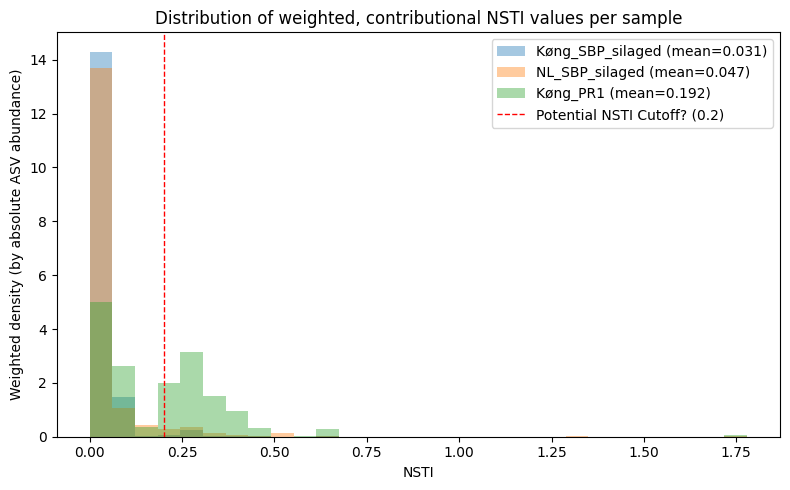

In [ ]:
###  NSTI DISTRIBUTION   ###
############################

# Below code uses the ASV-NSTI map (i.e. marker_predicted_and_nsti.tsv) and stratified ASV abundance to obtain contributional NSTI values for each sample

# df = data_nsti_map
df = data_nsti_map.copy()

# Selecting the three samples
sample_cols = ['barcode01', 'barcode25', 'barcode49']
sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}


# Normalising 
df = df.rename(columns={'sequence': 'taxon'})


# Remove 16S_rRNA_count column
df = df[['taxon', 'metadata_NSTI']].dropna(subset=['taxon']).copy()


# Extract columns from data_ec_contrib_filtered
use_cols = ['sample', 'taxon', 'taxon_abun']
sub = data_ec_contrib_filtered.loc[data_ec_contrib_filtered['sample'].isin(sample_cols), use_cols].copy()


# Ensure numeric abundance
sub["taxon_abun"] = pd.to_numeric(sub["taxon_abun"], errors="coerce").fillna(0)
df["metadata_NSTI"] = pd.to_numeric(df["metadata_NSTI"], errors="coerce").fillna(0)


# Rename NSTI column
df = df.rename(columns={"metadata_NSTI": "nsti"})


# Join NSTI onto contributional data
df  = sub.merge(df, on='taxon', how='left')


# Calculate per-sample contributional NSTI values
# weighted_NSTI(sample) = sum( NSTI_j * taxon_abun_j ) / sum( taxon_abun_j )
grp = df.groupby("sample", as_index=False).apply(
    lambda g: pd.Series({
        "weighted_nsti": (g["nsti"] * g["taxon_abun"]).sum() / max(g["taxon_abun"].sum(), 1e-12),
        "n_asvs": g["taxon"].nunique(),
        "total_abun": g["taxon_abun"].sum(),
    })
).reset_index(drop=True)

grp["sample_label"] = grp["sample"].map(sample_name_map).fillna(grp["sample"])
df["sample_label"] = df["sample"].map(sample_name_map).fillna(df["sample"])

# Visualise distribution of weighted NSTI values per sample
mean_map = dict(zip(grp["sample"], grp["weighted_nsti"]))

plt.figure(figsize=(8,5))
bins = np.linspace(0, max(0.35, df["nsti"].max()), 30)

for s in sample_cols:
    sub = df.loc[df["sample"] == s]
    if sub.empty:
        continue
    mean_val = mean_map.get(s, np.nan)
    plt.hist(
        sub["nsti"],
        bins=bins,
        weights=sub["taxon_abun"],
        alpha=0.4,
        label=f"{sample_name_map.get(s, s)} (mean={mean_val:.3f})" if pd.notna(mean_val) else sample_name_map.get(s, s),
        density=True,
    )  # density for shape comparability


plt.axvline(0.2, color='red', linestyle='--', linewidth=1, label='Potential NSTI Cutoff? (0.2)')


plt.xlabel("NSTI")
plt.ylabel("Weighted density (by absolute ASV abundance)")
plt.title("Distribution of weighted, contributional NSTI values per sample")
plt.legend()
plt.tight_layout()
plt.show()



/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

<Figure size 800x500 with 0 Axes>

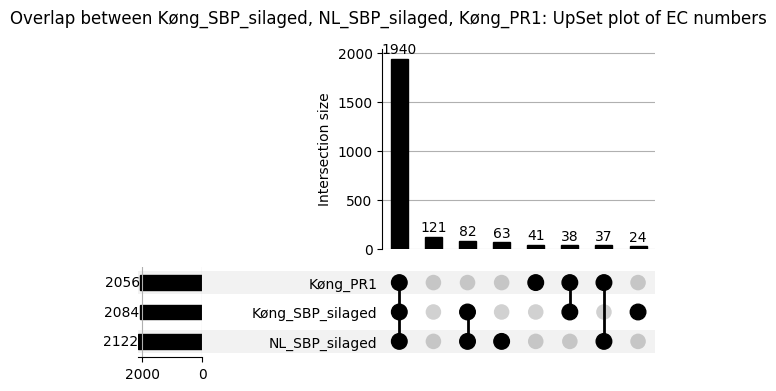

In [ ]:
###    EC UPSET PLOT     ###
############################

# df = data_ec_unstrat_filtered
df = data_ec_unstrat_filtered.copy()

# input
sample_cols_ec = ['barcode01', 'barcode25', 'barcode49']
cols = ["function"] + sample_cols_ec
presence_threshold = 0.0

sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}

# Rename the columns
df = df.rename(columns=sample_name_map)

# Update column lists to match the new names
sample_cols_ec = list(sample_name_map.values())
cols = ["function"] + sample_cols_ec

df = df[cols].copy()
for c in sample_cols_ec:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)

# Presence/absence matrix
bin_df = df.copy()
for c in sample_cols_ec:
    bin_df[c] = (bin_df[c] > presence_threshold).astype(int)

# Dictionary of sets
sets = {s: set(bin_df.loc[bin_df[s] == 1, "function"]) for s in sample_cols_ec}

# UpSet plot
ind = (bin_df.set_index("function")[sample_cols_ec] == 1)
data = from_indicators(ind.columns, ind)

plt.figure(figsize=(8,5))
UpSet(data, show_counts=True, sort_by="cardinality").plot()
plt.suptitle("Overlap between Køng_SBP_silaged, NL_SBP_silaged, Køng_PR1: UpSet plot of EC numbers")
plt.tight_layout()
plt.show()

/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/student.aau.dk/yr42on/.conda/envs/picrust25/lib/python3.9/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

<Figure size 800x500 with 0 Axes>

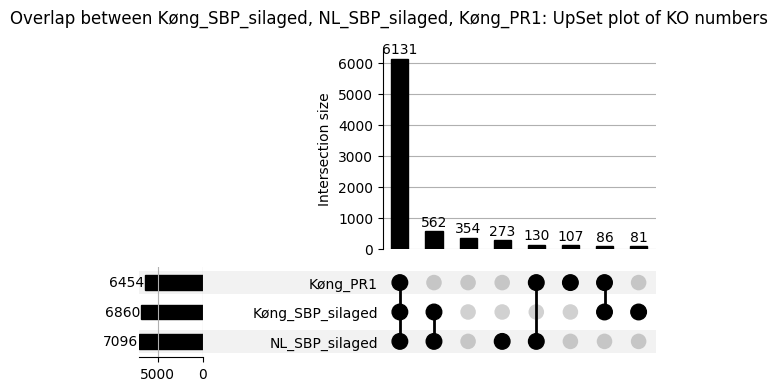

In [34]:
############################
###    KO UPSET PLOT     ###
############################

# df = data_ko_unstrat_filtered
df = data_ko_unstrat_filtered.copy()

# input
sample_cols_ko = ['barcode01', 'barcode25', 'barcode49']
cols = ["function"] + sample_cols_ko
presence_threshold = 0.0

sample_name_map = {
    'barcode01': 'Køng_SBP_silaged',
    'barcode25': 'NL_SBP_silaged',
    'barcode49': 'Køng_PR1'
}

# Rename the columns
df = df.rename(columns=sample_name_map)

# Update column lists to match the new names
sample_cols_ko = list(sample_name_map.values())
cols = ["function"] + sample_cols_ko

df = df[cols].copy()
for c in sample_cols_ko:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)

# Presence/absence matrix
bin_df = df.copy()
for c in sample_cols_ko:
    bin_df[c] = (bin_df[c] > presence_threshold).astype(int)

# Dictionary of sets
sets = {s: set(bin_df.loc[bin_df[s] == 1, "function"]) for s in sample_cols_ko}

# UpSet plot
ind = (bin_df.set_index("function")[sample_cols_ko] == 1)
data = from_indicators(ind.columns, ind)

plt.figure(figsize=(8,5))
UpSet(data, show_counts=True, sort_by="cardinality").plot()
plt.suptitle("Overlap between Køng_SBP_silaged, NL_SBP_silaged, Køng_PR1: UpSet plot of KO numbers")
plt.tight_layout()
plt.show()

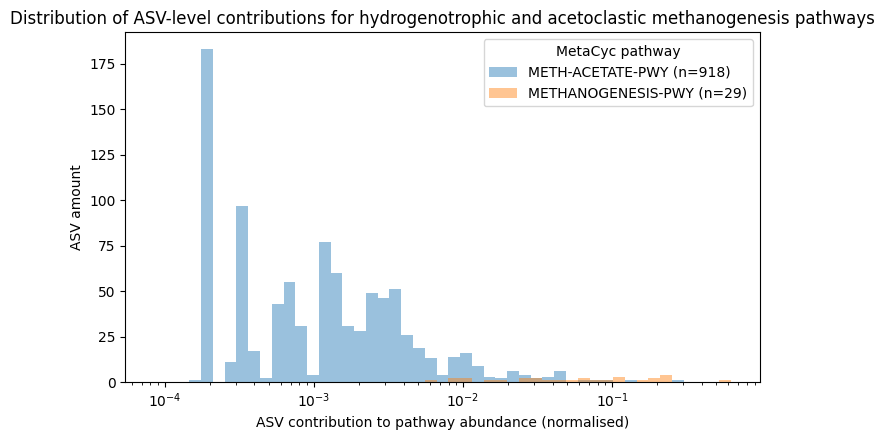

      sample    function             taxon taxon_abun         taxon_rel_abun  \
0  barcode01  1CMET2-PWY  FLASV100071.1378        7.0   0.014190389619446188   
1  barcode01  1CMET2-PWY  FLASV100485.1367        1.0  0.0020271985170637412   
2  barcode01  1CMET2-PWY  FLASV100491.1367       0.75  0.0015203988877978056   
3  barcode01  1CMET2-PWY  FLASV100665.1364        1.0  0.0020271985170637412   
4  barcode01  1CMET2-PWY  FLASV100718.1376        1.0  0.0020271985170637412   
5  barcode01  1CMET2-PWY  FLASV100751.1353        1.0  0.0020271985170637412   
6  barcode01  1CMET2-PWY  FLASV100878.1362        0.5  0.0010135992585318706   
7  barcode01  1CMET2-PWY  FLASV100904.1346        1.0  0.0020271985170637412   
8  barcode01  1CMET2-PWY  FLASV100978.1344        1.0  0.0020271985170637412   
9  barcode01  1CMET2-PWY     FLASV101.1438        1.0  0.0020271985170637412   

  genome_function_count taxon_function_abun taxon_rel_function_abun  \
0                   1.0                 7.0    0

In [36]:
############################
### PATHWAY CONTRIBUTORS ###
############################

# df = data_path_abun_contrib_filtered
df = data_path_abun_contrib_filtered.copy()

# Pathways of interest
pathways = ['METH-ACETATE-PWY', # Acetoclastic methanogenesis
            'METHANOGENESIS-PWY'] # Hydrogenotrophic methanogenesis


# Ensure numeric values
df["norm_taxon_function_contrib"] = pd.to_numeric(
    df["norm_taxon_function_contrib"]
        .astype(str)
        .str.strip()
        .str.replace(",", ".", regex=False)
        .str.replace(r"[^\d\.\-eE+]", "", regex=True),
    errors="coerce"
)


# Log scale friendly data
df = df[df['norm_taxon_function_contrib'] > 0]


# Subsetting 
sub = df[df["function"].isin(pathways)].copy()


## Histogram ##
plt.figure(figsize=(7.2, 4.5))


# Common log-spaced bins across [1e-4, 1]
xmin = max(1e-6, sub['norm_taxon_function_contrib'].min() * 0.5)
xmin = 1e-6 if np.isinf(xmin) or np.isnan(xmin) else xmin
xmin = max(xmin, 1e-6)
xmax = min(1.0, max(1e-6, sub['norm_taxon_function_contrib'].max() * 1.1))
bins = np.logspace(np.log10(xmin), np.log10(xmax if xmax > xmin else xmin*10), 50)

for pw in pathways:
    s = sub.loc[sub["function"] == pw, 'norm_taxon_function_contrib']
    if s.empty:
        continue
    plt.hist(
        s.values,
        bins=bins,
        density=False,
        alpha=0.45,
        label=f"{pw} (n={len(s)})",
        edgecolor="none",
    )


plt.xscale("log")
plt.xlabel("ASV contribution to pathway abundance (normalised)")
plt.ylabel("ASV amount")
plt.title("Distribution of ASV-level contributions for hydrogenotrophic and acetoclastic methanogenesis pathways")
plt.legend(title="MetaCyc pathway")
plt.tight_layout()
plt.show()


print(df.head(10))

/tmp/ipykernel_1665370/3343428453.py:100: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genus_contrib.groupby("function", group_keys=False)
/tmp/ipykernel_1665370/3343428453.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x="total_abundance", y="genus", palette="viridis")


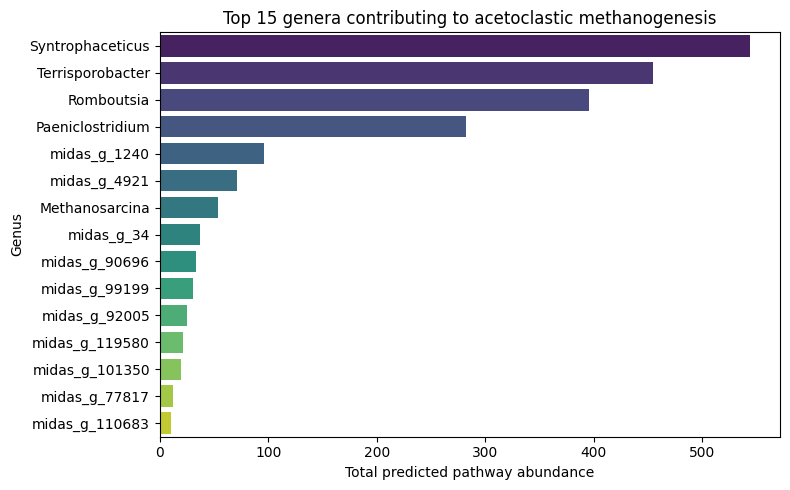

/tmp/ipykernel_1665370/3343428453.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2, x="total_abundance", y="genus", palette="mako")


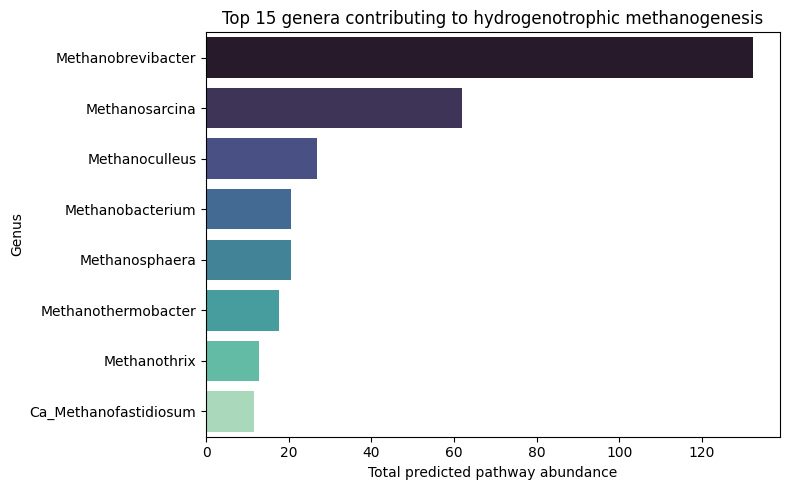

In [20]:
##############################
### COLLAPSING TO TAXONOMY ###
##############################

# df = data_path_abun_contrib_filtered
df = data_path_abun_contrib_filtered.copy()


# Use only taxon_function_abun, function, taxon columns
df = df[['function', 'taxon', 'taxon_function_abun']].copy()


# Keep only pathways of interest
pathways = ['METH-ACETATE-PWY', # Acetoclastic methanogenesis
            'METHANOGENESIS-PWY'] # Hydrogenotrophic methanogenesis
df = df[df["function"].isin(pathways)].copy()


# Ensuring abundance is numeric
df['taxon_function_abun'] = pd.to_numeric(df['taxon_function_abun'], errors='coerce').fillna(0.0)


# Collapse ASV-level contributions to taxonomy level
taxon_contrib = (
    df.groupby(["function", "taxon"], as_index=False)["taxon_function_abun"]
      .sum()
      .rename(columns={"taxon_function_abun": "total_contribution"})
)


# Within-pathway relative contribution per taxon
taxon_contrib["rel_contribution"] = (
    taxon_contrib.groupby("function")["total_contribution"].transform(lambda x: x / x.sum())
)



## Join taxonomy


# Load tax file
tax = pd.read_csv('~/Thesis/data/tax_complete_qiime.txt', sep='\t', header=None, names=['taxon', 'taxonomy'], dtype=str)
tax["taxon"] = tax["taxon"].str.strip()
tax["taxonomy"] = tax["taxonomy"].str.strip()


# Merge taxonomy onto contribution data
merged = df.merge(tax, on='taxon', how='left')


## Top 15 contributing genera per pathway

# Split taxonomies up into seperate columns
ranks = {
    "kingdom": "k__", "phylum": "p__", "class": "c__", "order": "o__",
    "family": "f__", "genus": "g__", "species": "s__"
}


# Extract each rank from the semicolon-delimited string
for col, prefix in ranks.items():
    merged[col] = merged["taxonomy"].str.extract(fr"{prefix}\s*([^;]+)", expand=False).str.strip()


# Convert abundance and aggregate by genus (or switch to any rank above)
merged["taxon_function_abun"] = pd.to_numeric(merged["taxon_function_abun"], errors="coerce").fillna(0)
genus_contrib = (
    merged.groupby(["function", "genus"], dropna=False)["taxon_function_abun"]
          .sum()
          .reset_index(name="total_abundance")
)


top15 = (genus_contrib.groupby("genus")["total_abundance"].sum().nlargest(15).index)


# Aggregate: sum contributions per genus and pathway
genus_contrib = (
    merged.groupby(["function", "genus"], as_index=False)["taxon_function_abun"]
      .sum()
      .rename(columns={"taxon_function_abun": "total_abundance"})
)


# Identify top 15 genera across both pathways combined
top15 = (
    genus_contrib.groupby("genus")["total_abundance"]
      .sum()
      .nlargest(15)
      .index
)


# Ensure function and genus are strings
genus_contrib["function"] = genus_contrib["function"].astype(str)
genus_contrib["genus"] = genus_contrib["genus"].astype(str)

# Identify top 15 genera per pathway
top15_per_pathway = (
    genus_contrib.groupby("function", group_keys=False)
                 .apply(lambda x: x.nlargest(15, "total_abundance"))
                 .reset_index(drop=True)
)


## Barplots for top 15 genera per pathway
path1 = "METH-ACETATE-PWY"      # Acetoclastic methanogenesis
path2 = "METHANOGENESIS-PWY"    # Hydrogenotrophic methanogenesis

# Plot 1: Acetoclastic methanogenesis

# Sort genera within each pathway for nicer plotting
data1 = (genus_contrib[genus_contrib["function"] == path1]
         .nlargest(15, "total_abundance"))

plt.figure(figsize=(8,5))
sns.barplot(data=data1, x="total_abundance", y="genus", palette="viridis")
plt.title("Top 15 genera contributing to acetoclastic methanogenesis")
plt.xlabel("Total predicted pathway abundance")
plt.ylabel("Genus")
plt.tight_layout()
plt.show()


# Plot 2: Hydrogenotrophic methanogenesis
data2 = (genus_contrib[genus_contrib["function"] == path2]
         .nlargest(15, "total_abundance"))

plt.figure(figsize=(8,5))
sns.barplot(data=data2, x="total_abundance", y="genus", palette="mako")
plt.title("Top 15 genera contributing to hydrogenotrophic methanogenesis")
plt.xlabel("Total predicted pathway abundance")
plt.ylabel("Genus")
plt.tight_layout()
plt.show()

/tmp/ipykernel_1665370/1972110839.py:55: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genus_contrib.groupby("function", group_keys=False)


In [29]:
print(merged.head(10))

      sample    function             taxon taxon_abun         taxon_rel_abun  \
0  barcode01  1CMET2-PWY  FLASV100071.1378        7.0   0.014190389619446188   
1  barcode01  1CMET2-PWY  FLASV100485.1367        1.0  0.0020271985170637412   
2  barcode01  1CMET2-PWY  FLASV100491.1367       0.75  0.0015203988877978056   
3  barcode01  1CMET2-PWY  FLASV100665.1364        1.0  0.0020271985170637412   
4  barcode01  1CMET2-PWY  FLASV100718.1376        1.0  0.0020271985170637412   
5  barcode01  1CMET2-PWY  FLASV100751.1353        1.0  0.0020271985170637412   
6  barcode01  1CMET2-PWY  FLASV100878.1362        0.5  0.0010135992585318706   
7  barcode01  1CMET2-PWY  FLASV100904.1346        1.0  0.0020271985170637412   
8  barcode01  1CMET2-PWY  FLASV100978.1344        1.0  0.0020271985170637412   
9  barcode01  1CMET2-PWY     FLASV101.1438        1.0  0.0020271985170637412   

  genome_function_count taxon_function_abun taxon_rel_function_abun  \
0                   1.0                 7.0    0